# 1. 1. Download the datasets:
# 1. dataset.csv – Containing 9000 customer information (labeled)
# 2. judge.csv – Containing 1000 customer information (unlabeled)

In [122]:
import pandas as pd
import numpy as np

In [123]:
data = pd.read_csv('dataset.csv')

In [124]:
sample = pd.read_csv('judge.csv')

# 2. Preprocess the dataset, and have a 80-20 split (training and test). Before doing that, please
# investigate which feature(s) might or might not have relations to the target variable “Exited”.
# You may want to drop those (very) distantly related features from your dataset. For instance,
# CustomerID, Surname may not have any correlation with the target output variable.

In [126]:
data.shape

(9000, 13)

In [127]:
data.head(10)
ds =data

In [128]:
ds.isnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [129]:
ds.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

10
                 CustomerId  CreditScore       Age    Tenure   Balance  \
CustomerId         1.000000     0.009131  0.011799 -0.019308 -0.013185   
CreditScore        0.009131     1.000000  0.001510  0.005011  0.002691   
Age                0.011799     0.001510  1.000000 -0.002760  0.022740   
Tenure            -0.019308     0.005011 -0.002760  1.000000 -0.020403   
Balance           -0.013185     0.002691  0.022740 -0.020403  1.000000   
NumOfProducts      0.013695     0.018595 -0.032364  0.012721 -0.303977   
HasCrCard         -0.014304    -0.005829 -0.013122  0.027363 -0.019647   
IsActiveMember    -0.002580     0.028403  0.085997 -0.029454 -0.010258   
EstimatedSalary    0.016346    -0.001163 -0.007878  0.004066  0.010424   
Exited            -0.006518    -0.024658  0.283791 -0.014703  0.114812   

                 NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
CustomerId            0.013695  -0.014304       -0.002580         0.016346   
CreditScore           0.01

[1.0,
 0.283791368148888,
 0.11481198642728122,
 0.00893753460755495,
 -0.0017052253846709723,
 -0.006518421203131531,
 -0.014703253331326705,
 -0.02465814462085502,
 -0.04837320851572251,
 -0.158099054711342]

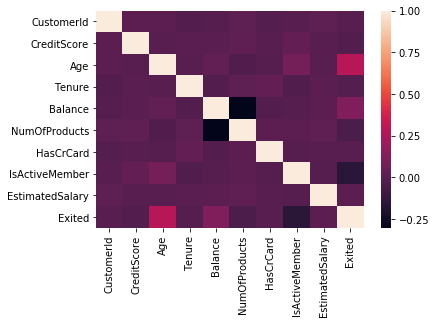

In [130]:
import seaborn as sns

#Correlation data 
ds_corrdata = ds.corr()
ax = sns.heatmap(ds_corrdata)

print(len(ds_corrdata))
print(ds_corrdata)
c= ds_corrdata.iloc[-1,:]
#print(a)
d= sorted(c, reverse=True)
d

In [131]:
ds1 = ds[['CreditScore', 'Age' , 'Balance','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
ds1
y = ds1[['Exited']]
x = ds1[['CreditScore', 'Age' , 'Balance','HasCrCard','IsActiveMember','EstimatedSalary']]

In [132]:


from sklearn.model_selection import train_test_split

x_test,x_train, y_test,y_train =train_test_split(x,y,test_size=0.8) 

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

7200
1800
7200
1800


In [133]:
x_train['x0'] =1
x_test['x0']=1

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 3. Design an artificial neural network, ANN using Keras library. For reference, please take a look
# here https://keras.io/getting-started/sequential-model-guide/. For simplicity, please use the
# `adam’ optimizer and ‘binary_crossentropy’ as the loss function the optimizer will use.

In [134]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[0.618      0.02702703 0.         ... 0.         0.56268064 0.        ]
 [0.562      0.10810811 0.59444299 ... 1.         0.61833791 0.        ]
 [0.34       0.54054054 0.         ... 1.         0.16357254 0.        ]
 ...
 [0.528      0.18918919 0.39642709 ... 1.         0.25525324 0.        ]
 [0.818      0.35135135 0.44279165 ... 0.         0.50047816 0.        ]
 [0.72       0.12162162 0.53917493 ... 0.         0.71089485 0.        ]]
[[0.186      0.62121212 0.52048453 ... 0.         0.36438156 0.        ]
 [0.944      0.21212121 0.54590699 ... 0.         0.54443645 0.        ]
 [0.468      0.27272727 0.51442076 ... 1.         0.35133115 0.        ]
 ...
 [0.478      0.42424242 0.         ... 1.         0.84278195 0.        ]
 [0.394      0.16666667 0.49004327 ... 1.         0.18565625 0.        ]
 [0.458      0.28787879 0.7141243  ... 0.         0.60163438 0.        ]]


In [135]:
import tensorflow.keras

from numpy import loadtxt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
#tensorflow.keras.optimizers.Adam(lr=0.001)
model = Sequential()
model.add(Dense(8, input_dim=7, activation='relu'))

model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [136]:
model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
7200/7200 [==============================] - 2s 295us/step - loss: 0.5469 - acc: 0.7551
Epoch 2/100
7200/7200 [==============================] - 1s 177us/step - loss: 0.4859 - acc: 0.7940
Epoch 3/100
7200/7200 [==============================] - 1s 176us/step - loss: 0.4697 - acc: 0.7957
Epoch 4/100
7200/7200 [==============================] - 1s 175us/step - loss: 0.4545 - acc: 0.8039
Epoch 5/100
7200/7200 [==============================] - 1s 194us/step - loss: 0.4444 - acc: 0.8114
Epoch 6/100
7200/7200 [==============================] - 1s 207us/step - loss: 0.4385 - acc: 0.8136
Epoch 7/100
7200/7200 [==============================] - 1s 180us/step - loss: 0.4336 - acc: 0.8174
Epoch 8/100
7200/7200 [==============================] - 1s 178us/step - loss: 0.4309 - acc: 0.8192
Epoch 9/100
7200/7200 [==============================] - 1s 181us/step - loss: 0.4283 - acc: 0.8203
Epoch 10/100
7200/7200 [==============================] - 1s 176us/step - loss: 0.4258 - acc: 0.8246

In [4]:
predictions = model.predict(x_train)

NameError: name 'model' is not defined

In [138]:
threshold = 0.5
for i in range(predictions.shape[0]):
    if predictions[i] >= threshold:
        predictions[i] =1
       # print("inside if")
    else:
        predictions[i] = 0
       # print("inside else")
    
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [139]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_train,predictions).ravel()
print("tn=",tn)
print("fp=",fp)
print("fn=",fn)
print("tp=",tp)

tn= 5569
fp= 148
fn= 1048
tp= 435


In [140]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_train,predictions)
f1score = f1_score(y_train,predictions,average='weighted')
recall = recall_score(y_train,predictions,average='weighted')
precision = precision_score(y_train,predictions,average='weighted')


In [141]:
print("accuracy =" , accuracy)
print("F1score =" , f1score)
print("recal =" ,recall)
print("precision =", precision)

accuracy = 0.8338888888888889
F1score = 0.8037683459685485
recal = 0.8338888888888889
precision = 0.821953961674279


# 4. Apply the ANN you designed above on the training set, and the apply the trained model on the
# test dataset.6

In [142]:
model.fit(x_test, y_test, epochs=100, batch_size=10)

Epoch 1/100
1800/1800 [==============================] - 0s 187us/step - loss: 0.4250 - acc: 0.8261
Epoch 2/100
1800/1800 [==============================] - 0s 194us/step - loss: 0.4203 - acc: 0.8278
Epoch 3/100
1800/1800 [==============================] - 0s 196us/step - loss: 0.4207 - acc: 0.8261
Epoch 4/100
1800/1800 [==============================] - 0s 194us/step - loss: 0.4190 - acc: 0.8289
Epoch 5/100
1800/1800 [==============================] - 0s 178us/step - loss: 0.4192 - acc: 0.8289
Epoch 6/100
1800/1800 [==============================] - 0s 203us/step - loss: 0.4195 - acc: 0.8283
Epoch 7/100
1800/1800 [==============================] - 0s 201us/step - loss: 0.4186 - acc: 0.8294
Epoch 8/100
1800/1800 [==============================] - 0s 192us/step - loss: 0.4192 - acc: 0.8300
Epoch 9/100
1800/1800 [==============================] - 0s 186us/step - loss: 0.4176 - acc: 0.8300
Epoch 10/100
1800/1800 [==============================] - 0s 175us/step - loss: 0.4185 - acc: 0.8300

In [143]:
predictions_test = model.predict(x_test)
predictions_test

array([[0.900126  ],
       [0.12234735],
       [0.1090112 ],
       ...,
       [0.24637866],
       [0.07059938],
       [0.26621246]], dtype=float32)

In [144]:
threshold = 0.5
for i in range(predictions_test.shape[0]):
    if predictions_test[i] >= threshold:
        predictions_test[i] =1
       # print("inside if")
    else:
        predictions_test[i] = 0
       # print("inside else")
    
print(predictions_test)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [145]:
accuracy_test = accuracy_score(y_test,predictions_test)
f1score_test = f1_score(y_test,predictions_test,average='weighted')
recall_test = recall_score(y_test,predictions_test,average='weighted')
precision_test = precision_score(y_test,predictions_test,average='weighted')

In [146]:
print("accuracy_test =" , accuracy_test)
print("F1score_test =" , f1score_test)
print("recal_test =" ,recall_test)
print("precision_test =", precision_test)

accuracy_test = 0.8333333333333334
F1score_test = 0.7983188674129238
recal_test = 0.8333333333333334
precision_test = 0.8155646022692921


# 5. Report the architecture, algorithm parameters, and performance into the Report document.

# 6. Write a program that has access to your best performing trained ANN (in terms of accuracy
# metric), and reads the judge.csv file. It will output judge-pred.csv containing only two fields:
# CustomerID, Exited for each of the judge instances present in the judge.csv file in the exact
# same order.

In [51]:
sample

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15605215,Stevenson,767,France,Male,48,9,0.00,2,0,1,175458.21
1,15567855,Chukwufumnanya,623,France,Female,29,1,0.00,2,0,0,39382.06
2,15780256,Palfreyman,630,France,Male,34,9,0.00,2,1,1,114006.35
3,15592229,Mullan,713,France,Female,52,0,185891.54,1,1,1,46369.57
4,15788683,Kang,588,Germany,Female,34,10,129417.82,1,1,0,153727.32
5,15693203,Powell,710,Spain,Female,75,5,0.00,2,1,1,9376.89
6,15635125,Findlay,566,Spain,Male,63,2,120787.18,2,1,1,52198.84
7,15582129,Hsia,517,France,Male,62,1,43772.66,3,1,0,187756.24
8,15703482,Walker,710,Germany,Male,34,9,134260.36,2,1,0,147074.67
9,15670738,Mazzanti,733,Germany,Male,45,2,113939.36,2,1,0,3218.71


In [52]:
sample1 = sample[['CreditScore', 'Age' , 'Balance','HasCrCard','IsActiveMember','EstimatedSalary']]
sample1['x0']=1

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sample1 = sc.fit_transform(sample1)
print(sample1)

[[0.81093394 0.5        0.         ... 1.         0.87759476 0.        ]
 [0.48291572 0.17241379 0.         ... 0.         0.19693355 0.        ]
 [0.49886105 0.25862069 0.         ... 1.         0.5702088  0.        ]
 ...
 [0.6332574  0.62068966 0.36852138 ... 0.         0.21185314 0.        ]
 [0.50341686 0.39655172 0.57779903 ... 1.         0.98024031 0.        ]
 [0.33712984 0.46551724 0.         ... 0.         0.10501587 0.        ]]


In [54]:
predictions_sample = model.predict(sample1)
predictions_sample

array([[0.20605251],
       [0.05275476],
       [0.06624487],
       [0.09706494],
       [0.18098035],
       [0.0170615 ],
       [0.09442651],
       [0.7891749 ],
       [0.16968876],
       [0.7849479 ],
       [0.0632638 ],
       [0.03748068],
       [0.05020815],
       [0.20631924],
       [0.09494948],
       [0.10185599],
       [0.23472649],
       [0.15487197],
       [0.02379033],
       [0.8513467 ],
       [0.09991491],
       [0.12363675],
       [0.16294551],
       [0.06747979],
       [0.74647266],
       [0.17879125],
       [0.18462211],
       [0.09030068],
       [0.14419052],
       [0.08535284],
       [0.0697729 ],
       [0.02211028],
       [0.02563393],
       [0.6102949 ],
       [0.115513  ],
       [0.3547963 ],
       [0.11292654],
       [0.09086582],
       [0.12091315],
       [0.48540792],
       [0.50011647],
       [0.09122947],
       [0.19235125],
       [0.21542451],
       [0.14419636],
       [0.83973324],
       [0.14192763],
       [0.244

In [55]:
threshold = 0.5
for i in range(predictions_sample.shape[0]):
    if predictions_sample[i] >= threshold:
        predictions_sample[i] =1
       # print("inside if")
    else:
        predictions_sample[i] = 0
       # print("inside else")
    
print(predictions_sample)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [56]:
predictions_sample =pd.DataFrame(predictions_sample)
predictions_sample.columns =['Exited']

In [58]:
sample_judge = sample[['CustomerId']]
sample_judge['Exited']= predictions_sample.Exited.values


header =['CustomerID', 'Exited']
print(sample_judge)
#Copying it to the CSV file
sample_judge.to_csv("judge-submission-run11.csv" , columns = header , index = False)

     CustomerId  Exited
0      15605215     0.0
1      15567855     0.0
2      15780256     0.0
3      15592229     0.0
4      15788683     0.0
5      15693203     0.0
6      15635125     0.0
7      15582129     1.0
8      15703482     0.0
9      15670738     1.0
10     15624775     0.0
11     15741094     0.0
12     15687828     0.0
13     15661708     0.0
14     15790497     0.0
15     15620103     0.0
16     15586680     0.0
17     15749557     0.0
18     15622443     0.0
19     15745533     1.0
20     15691647     0.0
21     15599289     0.0
22     15766826     0.0
23     15643523     0.0
24     15720637     1.0
25     15693947     0.0
26     15726556     0.0
27     15591257     0.0
28     15792473     0.0
29     15605113     0.0
..          ...     ...
970    15719579     0.0
971    15749947     0.0
972    15793856     0.0
973    15620756     0.0
974    15617166     0.0
975    15708791     0.0
976    15800620     0.0
977    15747288     0.0
978    15578073     0.0
979    15786905 

C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
